<a href="https://colab.research.google.com/github/danielquillanroxas/Instance-Segmentation-Inovako/blob/main/InovakoInternship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data_path = "/content/drive/MyDrive/Fruit Segmentation.v1i.yolov8"

data_path_yaml = "/content/drive/MyDrive/Fruit Segmentation.v1i.yolov8/data.yaml"

%cd "/content/drive/MyDrive/Fruit Segmentation.v1i.yolov8/"
!ls

/content/drive/MyDrive/Fruit Segmentation.v1i.yolov8
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Wz8HfIKtjcmNZuVz0jHS")
project = rf.workspace("inovako-kcirb").project("fruit-segmentation-paylk")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.45, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Fruit-Segmentation-1 in yolov8:: 100%|██████████| 300/300 [00:01<00:00, 182.31it/s]


In [4]:
!pip install ultralytics
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.6/793.6 kB 8.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [9]:

import os
import random
import shutil

def move_random_files(source_directory, destination_directory, num_files=20):
    if not os.path.exists(source_directory):
        print(f"Source directory '{source_directory}' does not exist.")
        return

    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    files = [f for f in os.listdir(source_directory) if os.path.isfile(os.path.join(source_directory, f))]

    num_files = min(num_files, len(files))

    selected_files = random.sample(files, num_files)
    print(selected_files)

    for file_name in selected_files:
        source_path = os.path.join(source_directory, file_name)
        destination_path = os.path.join(destination_directory, file_name)

        shutil.move(source_path, destination_path)
        print(f"Moved: {file_name} from '{source_directory}' to '{destination_directory}'")

if __name__ == "__main__":
    # Specify the paths of the source and destination directories
    source_directory_path = "/content/drive/MyDrive/Fruit Segmentation.v1i.yolov8/train"
    destination_directory_path = "/content/drive/MyDrive/Fruit Segmentation.v1i.yolov8/valid"

    # Call the function to move random files
    move_random_files(source_directory_path, destination_directory_path)


[]


In [26]:

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 30.5/201.2 GB disk)


In [12]:

from ultralytics import YOLO

from IPython.display import display, Image

In [15]:
!yolo task=segment mode=train model=yolov8s-seg.pt data="/content/drive/MyDrive/Fruit Segmentation.v1i.yolov8/data.yaml" epochs=20 imgsz=640


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/drive/MyDrive/Fruit Segmentation.v1i.yolov8/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic

In [16]:
!yolo task=segment mode=val model="/content/drive/MyDrive/Fruit Segmentation.v1i.yolov8/runs/segment/train2/weights/best.pt" data="/content/drive/MyDrive/Fruit Segmentation.v1i.yolov8/data.yaml"

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/MyDrive/Fruit Segmentation.v1i.yolov8/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100% 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0% 0/1 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native

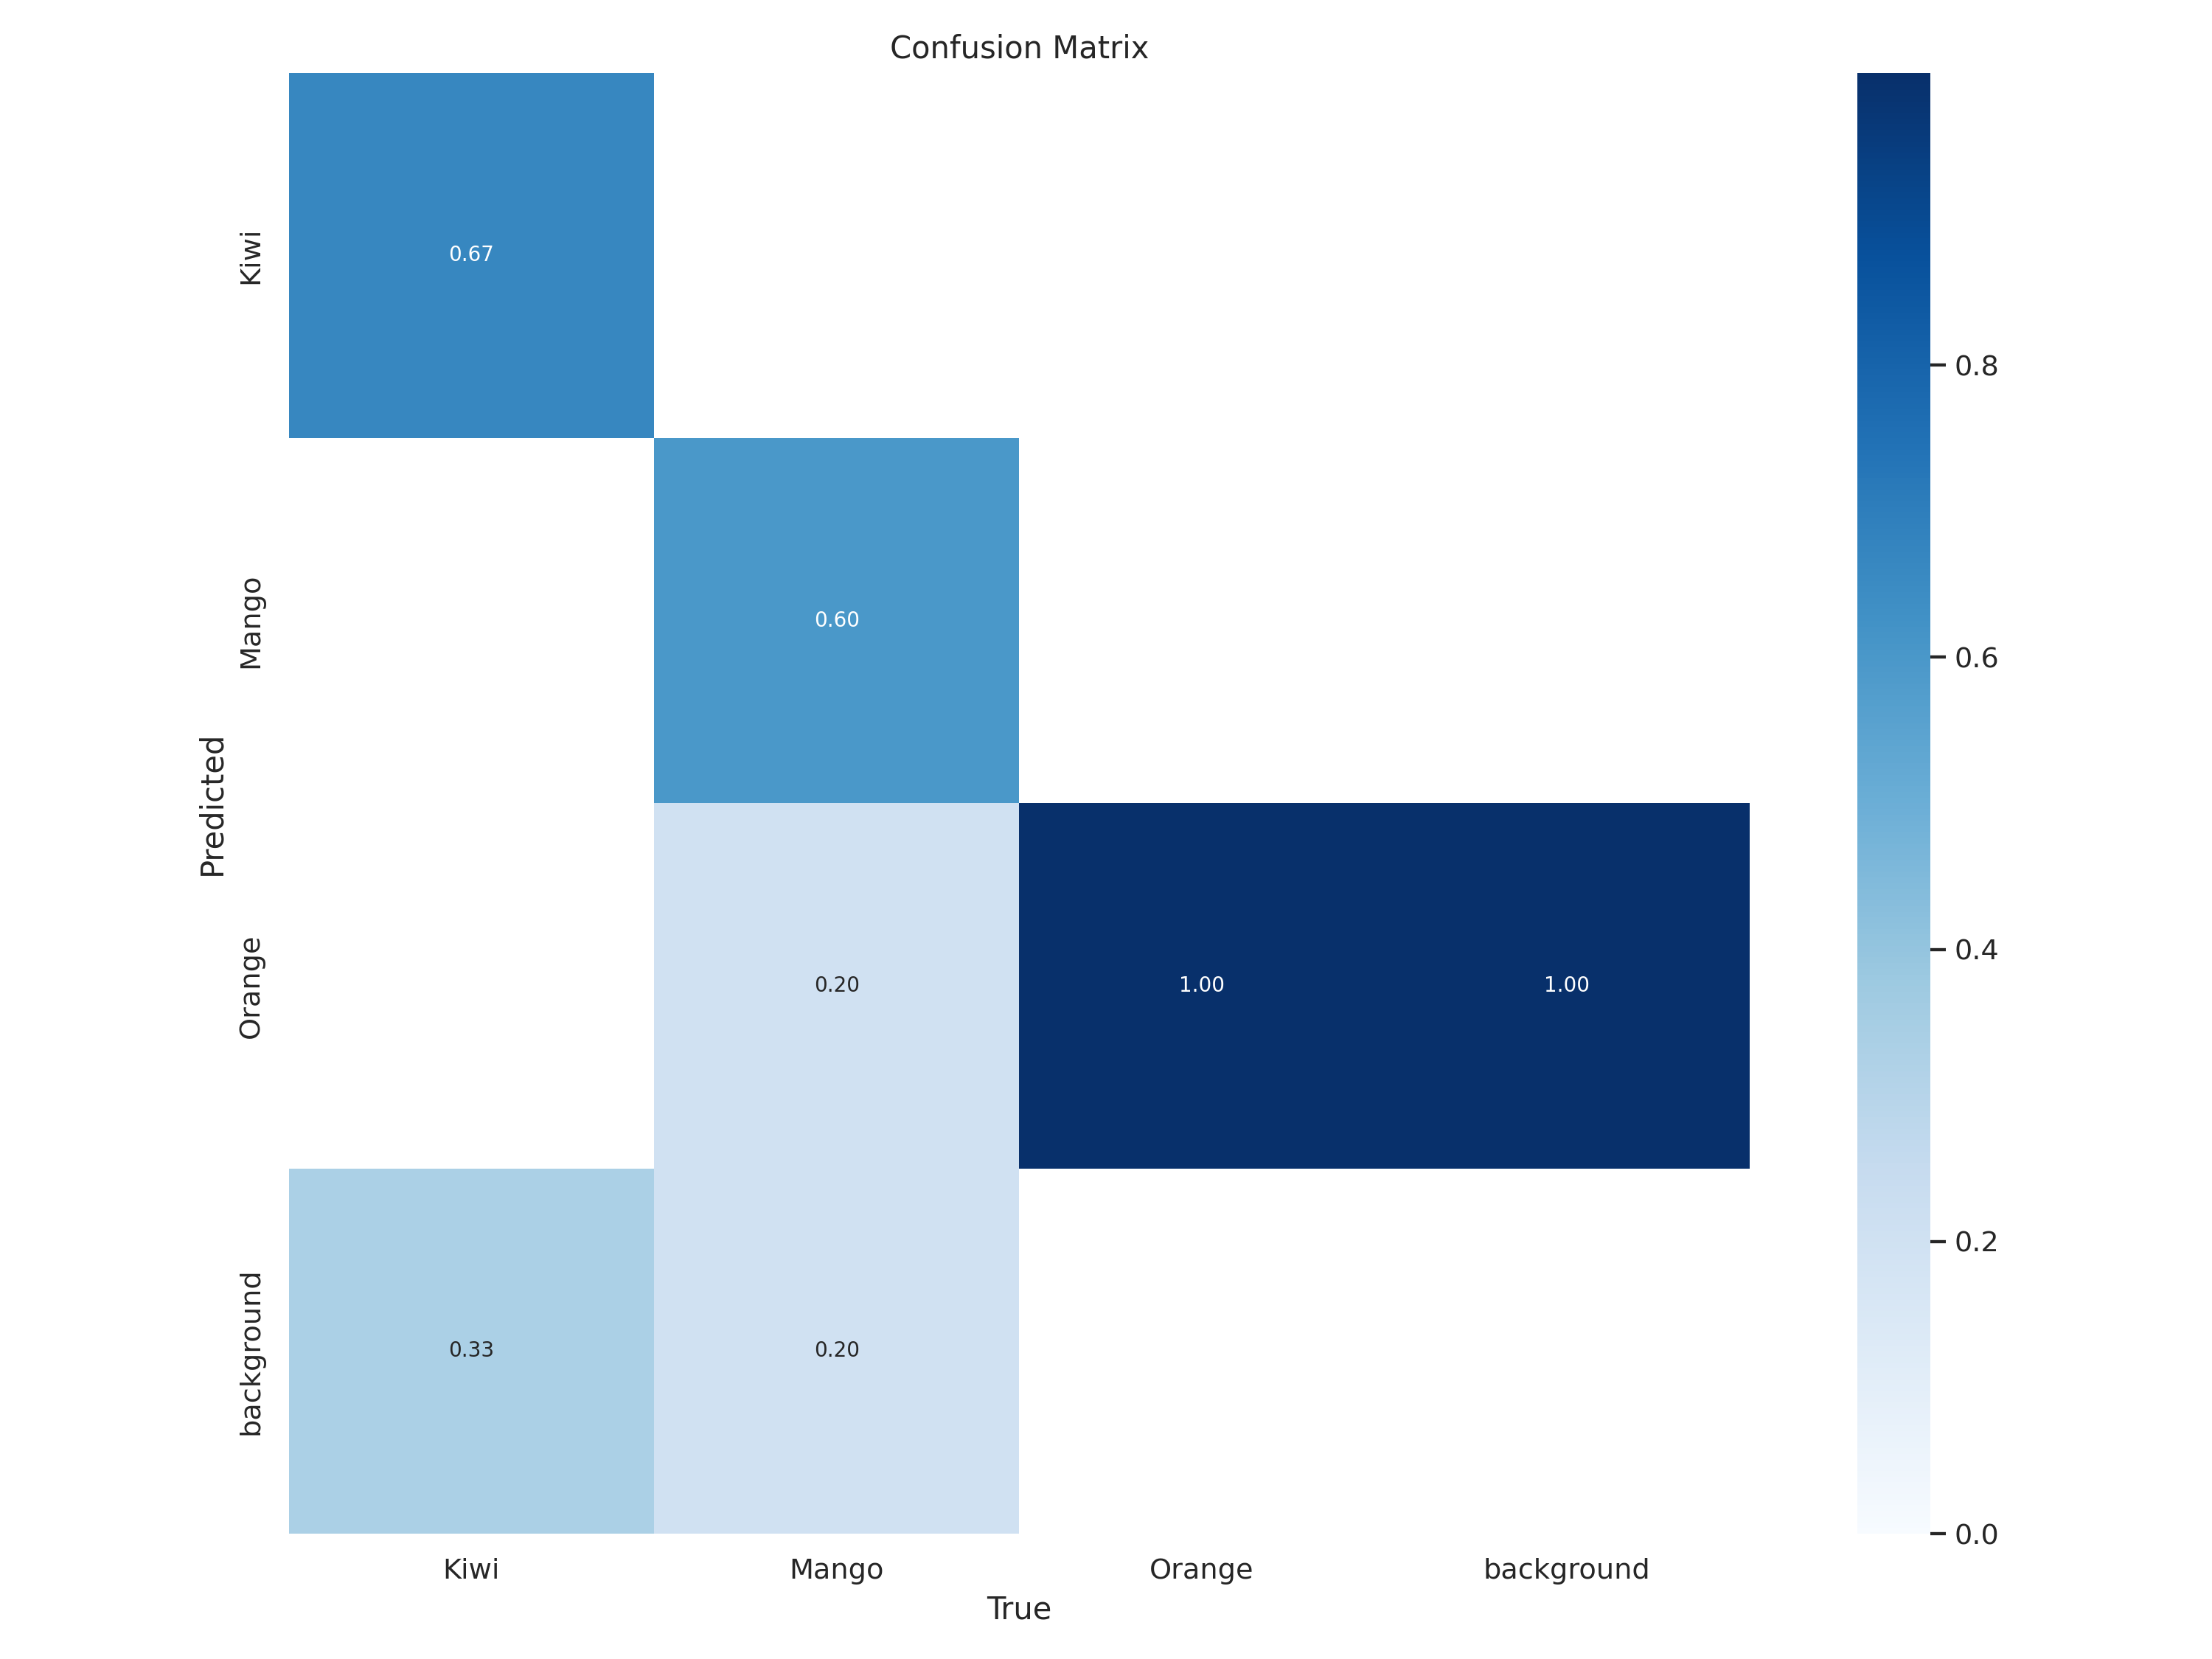

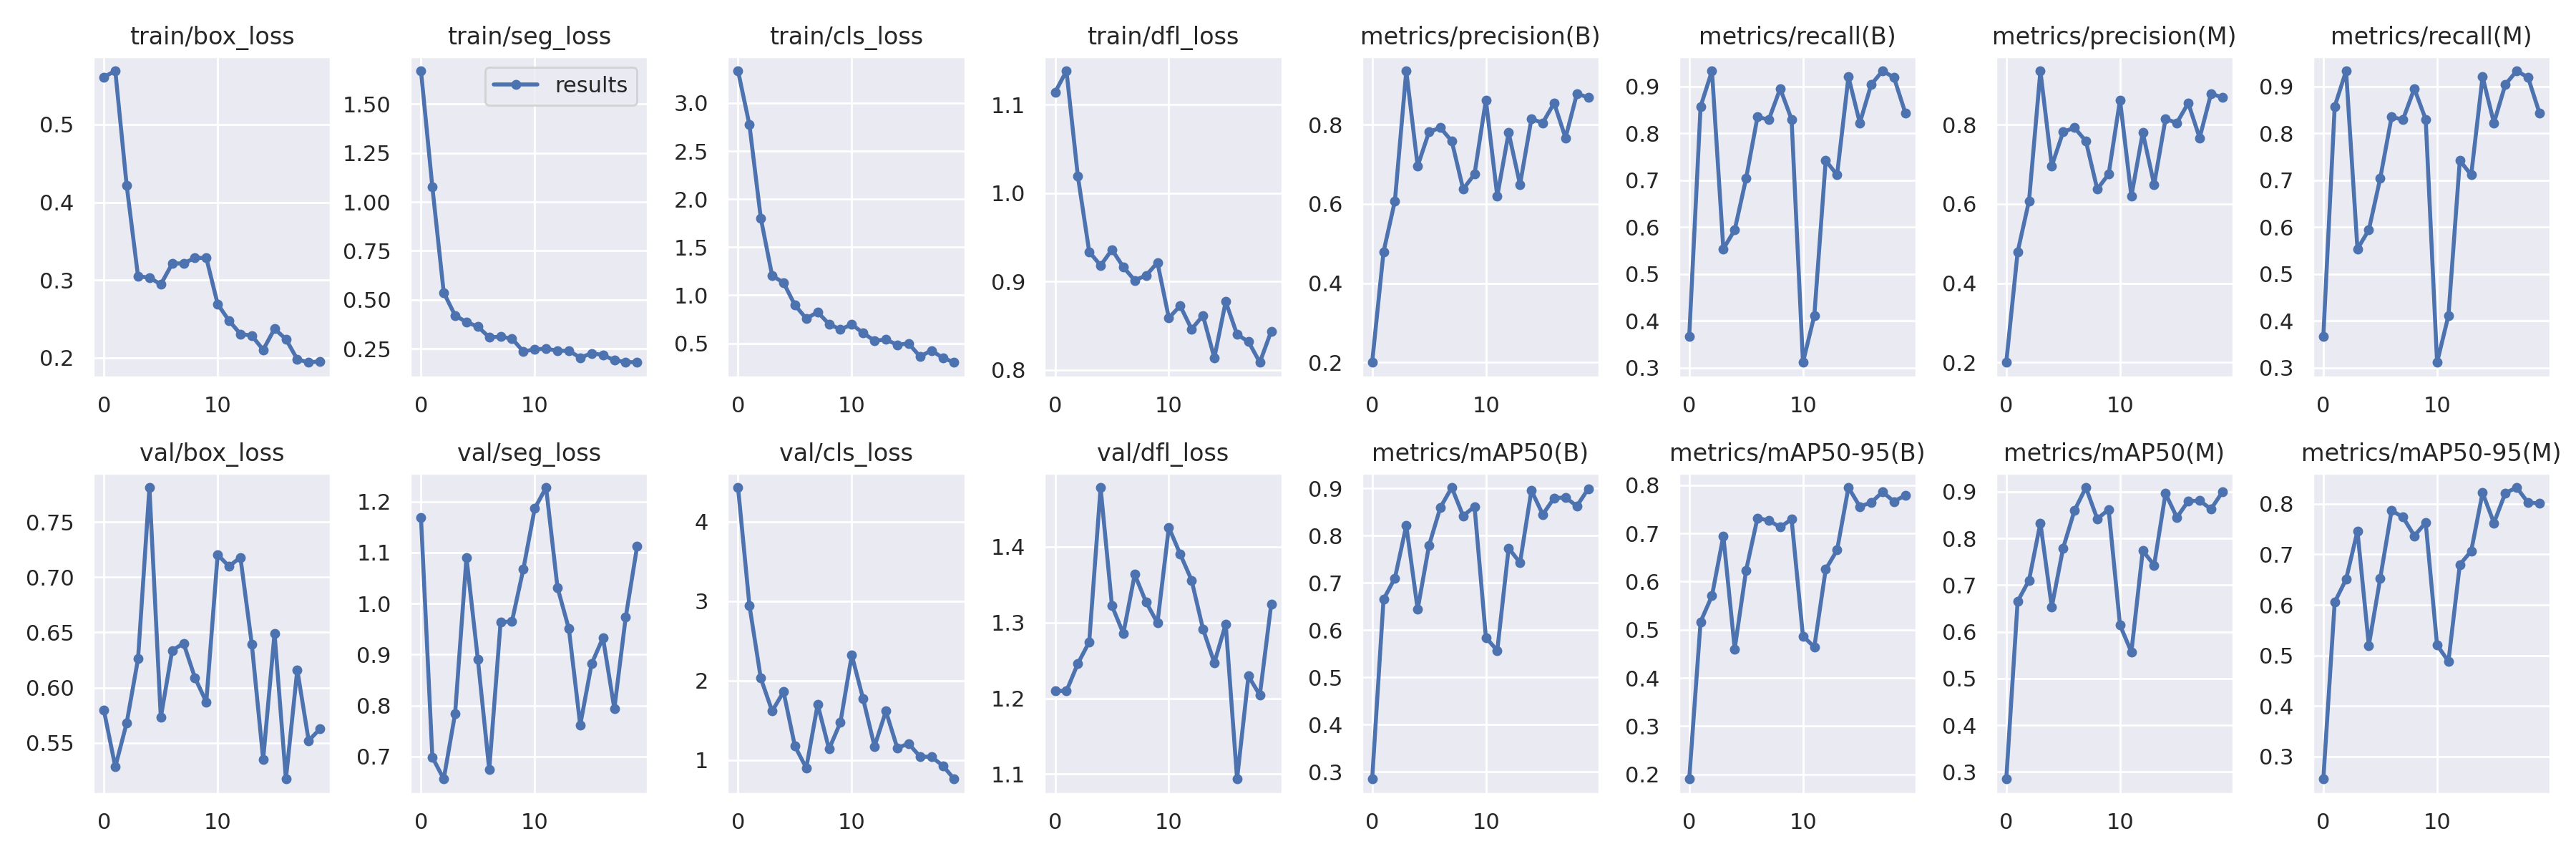

In [18]:
from IPython.display import Image, display

display(Image(filename=f"/content/drive/MyDrive/Fruit Segmentation.v1i.yolov8/runs/segment/train2/confusion_matrix.png"))

display(Image(filename=f"/content/drive/MyDrive/Fruit Segmentation.v1i.yolov8/runs/segment/train2/results.png"))

In [38]:
print(dir(results))
# print(results.keys())
print(results)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'ap_class_index', 'box', 'class_result', 'confusion_matrix', 'curves', 'curves_results', 'fitness', 'keys', 'maps', 'mean_results', 'names', 'on_plot', 'plot', 'process', 'results_dict', 'save_dir', 'seg', 'speed', 'task']
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79e3b5a90310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confi

# **Metrics**

In [40]:
dataset_config = "/content/drive/MyDrive/Fruit Segmentation.v1i.yolov8/data.yaml"
results = model.val(data=dataset_config)

print(f"Overall Precision (Box): {results.results_dict['metrics/precision(B)']:.3f}")
print(f"Overall Recall (Box): {results.results_dict['metrics/recall(B)']:.3f}")
print(f"Overall mAP@0.5 (Box): {results.results_dict['metrics/mAP50(B)']:.3f}")
print(f"Overall mAP@0.5:0.95 (Box): {results.results_dict['metrics/mAP50-95(B)']:.3f}")

Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)


val: Scanning /content/drive/MyDrive/Fruit Segmentation.v1i.yolov8/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


                   all         12         12      0.833      0.921      0.896      0.796      0.833      0.921      0.896      0.822
                  Kiwi          3          3          1      0.982      0.995      0.899          1      0.982      0.995      0.931
                 Mango          5          5          1       0.78      0.806        0.6          1       0.78      0.806      0.648
                Orange          4          4        0.5          1      0.888      0.888        0.5          1      0.888      0.888
Speed: 0.2ms preprocess, 5.3ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/segment/val4
Overall Precision (Box): 0.833
Overall Recall (Box): 0.921
Overall mAP@0.5 (Box): 0.896
Overall mAP@0.5:0.95 (Box): 0.796


In [20]:
from ultralytics import YOLO


model = YOLO('/content/drive/MyDrive/Fruit Segmentation.v1i.yolov8/runs/segment/train2/weights/best.pt')


In [59]:

from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import os


image_dir = '/content/drive/MyDrive/Fruit Segmentation.v1i.yolov8/unseen_photos'

image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith('.jpg')]

print(f"Found {len(image_paths)} images.")

Found 15 images.


# **Testing 5 photos for each fruit**

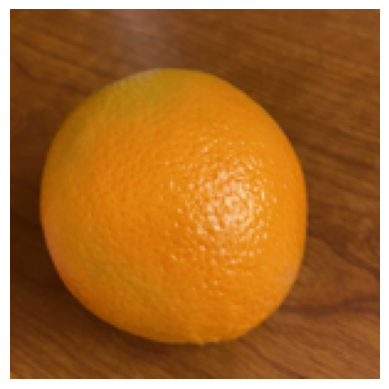


0: 640x640 1 Orange, 13.8ms
Speed: 4.3ms preprocess, 13.8ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


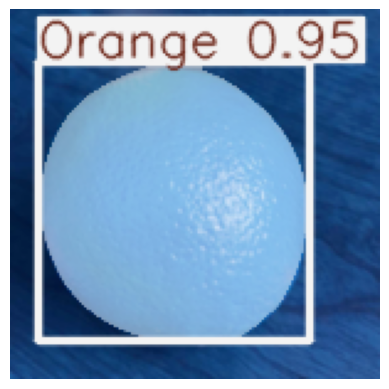

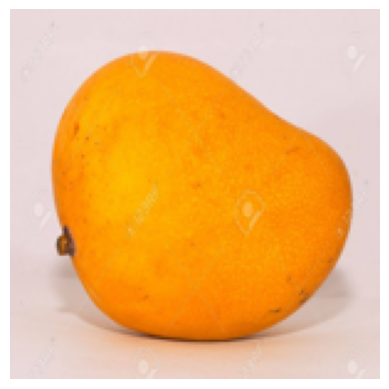


0: 640x640 1 Mango, 9.1ms
Speed: 2.3ms preprocess, 9.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


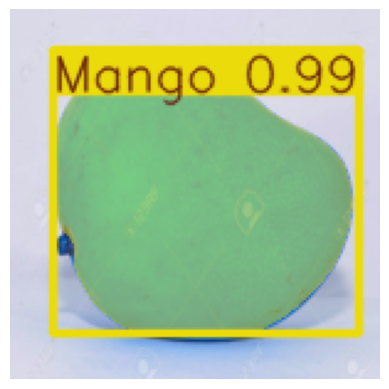

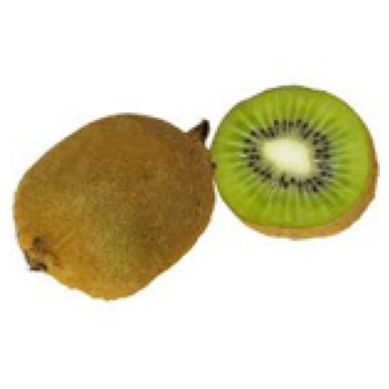


0: 640x640 1 Kiwi, 9.9ms
Speed: 2.3ms preprocess, 9.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


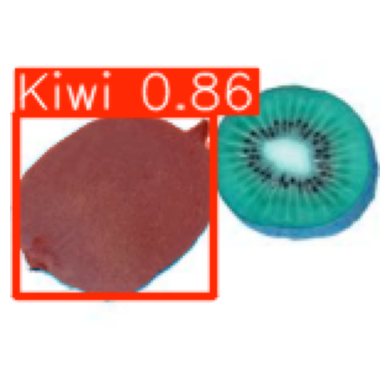

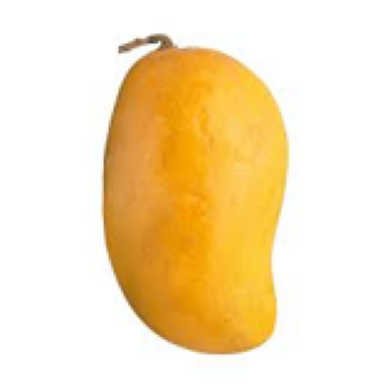


0: 640x640 1 Mango, 11.6ms
Speed: 2.8ms preprocess, 11.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


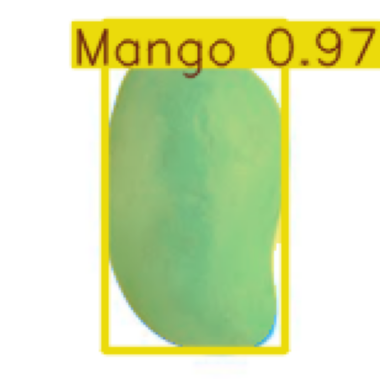

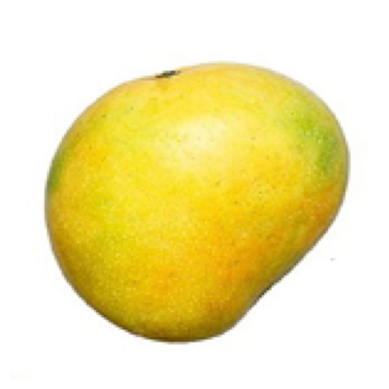


0: 640x640 1 Mango, 9.5ms
Speed: 2.2ms preprocess, 9.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


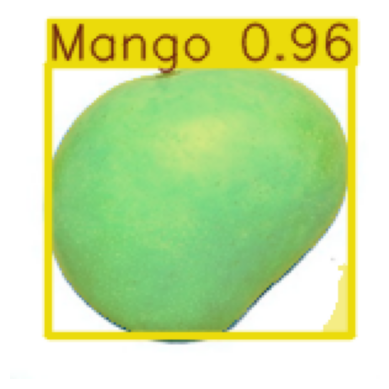

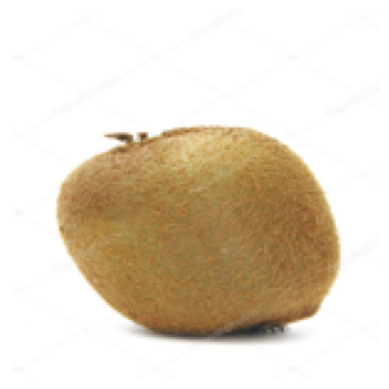


0: 640x640 1 Kiwi, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


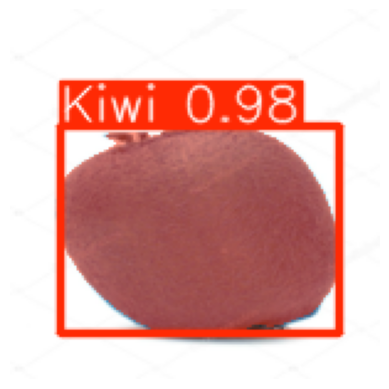

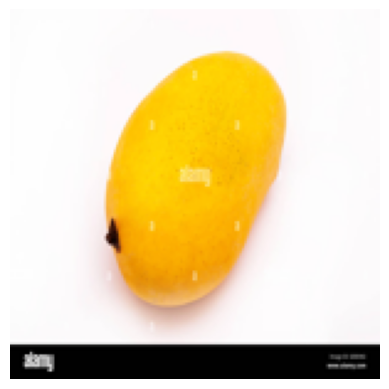


0: 640x640 1 Mango, 9.6ms
Speed: 2.4ms preprocess, 9.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


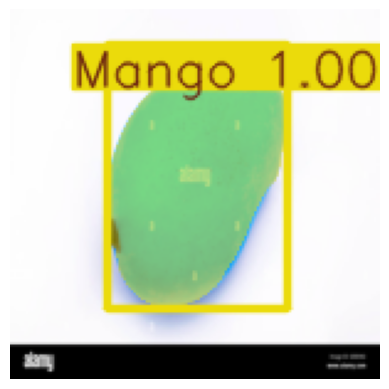

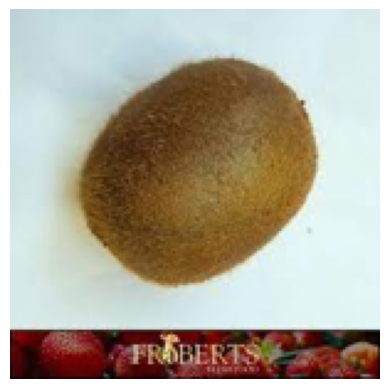


0: 640x640 1 Kiwi, 10.8ms
Speed: 2.4ms preprocess, 10.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


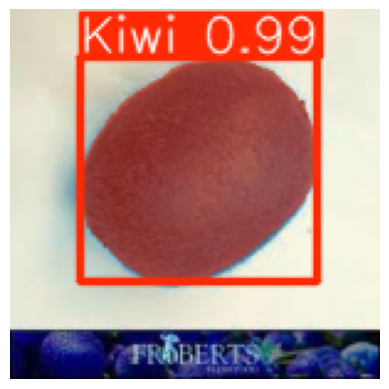

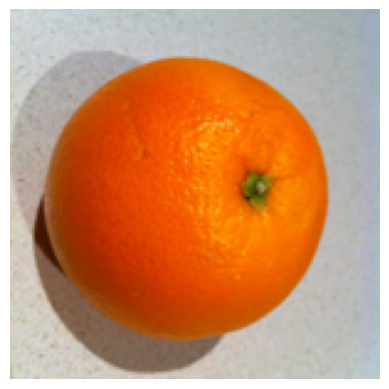


0: 640x640 1 Orange, 10.0ms
Speed: 2.5ms preprocess, 10.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


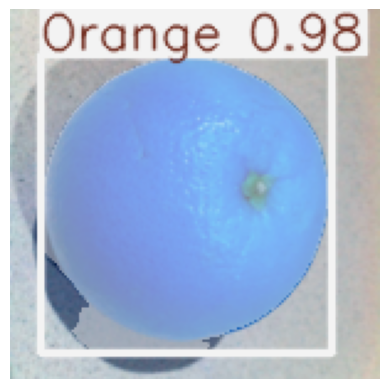

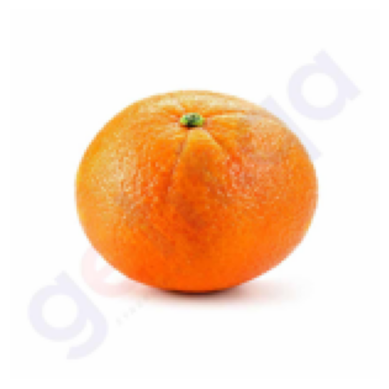


0: 640x640 1 Orange, 9.4ms
Speed: 2.5ms preprocess, 9.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


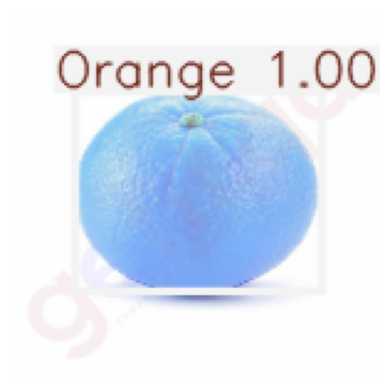

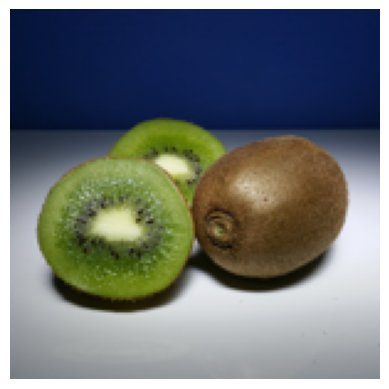


0: 640x640 2 Kiwis, 10.7ms
Speed: 2.4ms preprocess, 10.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


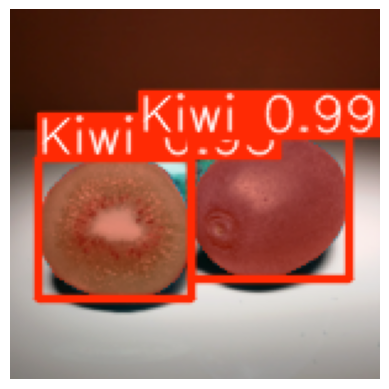

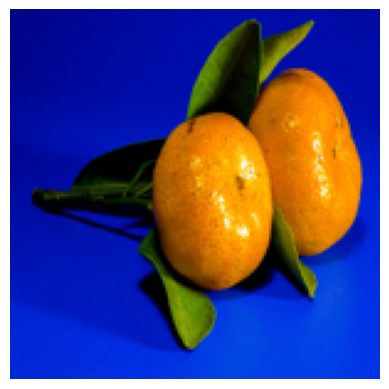


0: 640x640 1 Orange, 9.5ms
Speed: 2.8ms preprocess, 9.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


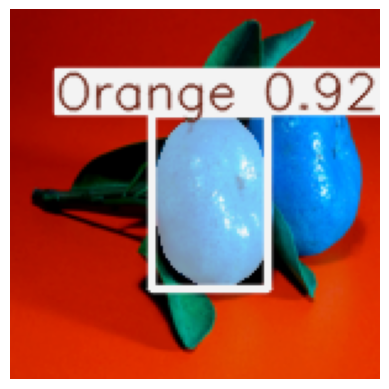

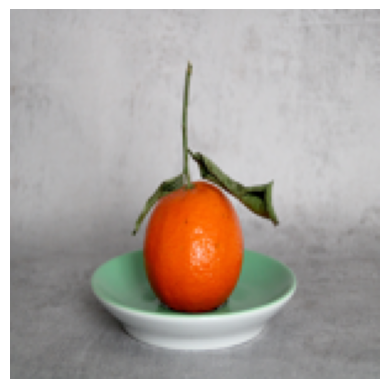


0: 640x640 1 Orange, 10.7ms
Speed: 2.4ms preprocess, 10.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


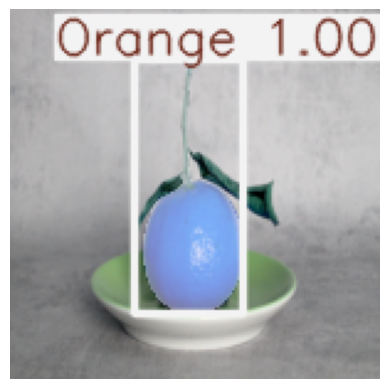

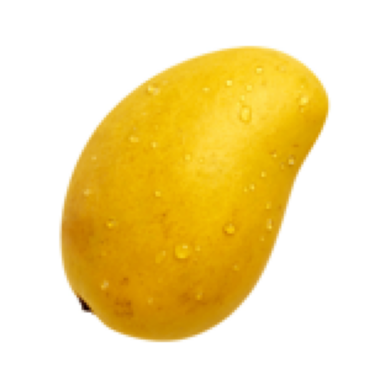


0: 640x640 1 Mango, 9.3ms
Speed: 2.5ms preprocess, 9.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


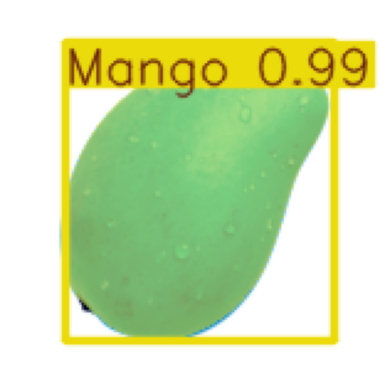

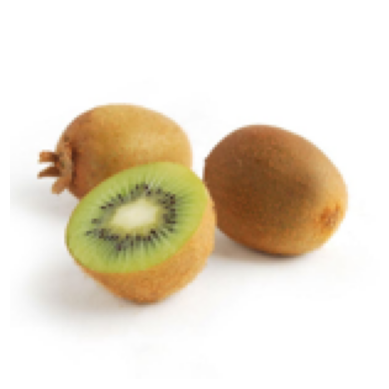


0: 640x640 1 Kiwi, 10.3ms
Speed: 2.7ms preprocess, 10.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


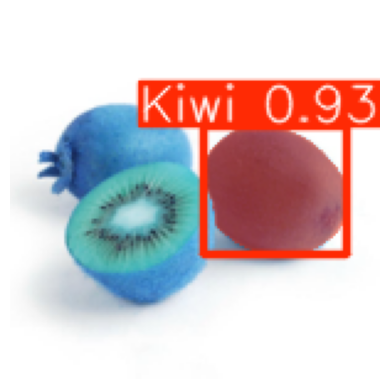

In [60]:
for image_path in image_paths:
    image = Image.open(image_path)

    image = image.resize((150, 150))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    image = image.resize((150, 150))
    results = model.predict(image)

    plt.imshow(results[0].plot())
    plt.axis('off')
    plt.show()